In [7]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models.abod import ABOD
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from keras.layers import Dropout


In [8]:
features = pd.read_csv('data/fma_metadata/df_analisi.csv',index_col=[0], header=[0,1,2])

features

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                          spectral_bandwidth spectral_contrast  \
statistics        std                      kurtosis               max   
number             02         04                 01                03   
track_id                                                                
2           38.569584  20.767921           3.874384         39.333603   
3           41.191982  22.025253           2.383340         42.141411   
5           39.367599  24.319347           0.895442         39.017235   
10          44.409843  14.013119           0.437628         45.410881   
134         47.266518  36.841534           0.372903         41.526760   
...               ...        ...                ...               ...   
155297      30.287067  12.060067          20.706787         40.720093   
155298      39.359367  18.604885           5.868375         39.627396   
155306      40.537926  28.671246           4.375974         40.628235   
155307      35.382370  22.123117          -0.383395         48.715477   
155314      26.786989  22.369673           0.011010         39.460281   

feature                           tonnetz metadata                              
statistics                  min       std      set         track                
number             04        02        01   subset     genre_top genre_top_Cat  
track_id                                                                        
2           31.513493  2.296826  0.019809    small       Hip-Hop             7  
3           31.473713  0.652681  0.026316   medium       Hip-Hop             7  
5           33.707951  2.314010  0.025550    small       Hip-Hop             7  
10          28.711344  4.415900  0.021413    small           Pop            12  
134         32.2243

In [9]:
attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 

X = features[attributes].values
y = features[('metadata','track','genre_top')]

df_SOLO_FEATURES=features.drop([('metadata','track','genre_top'),('metadata','set','subset'),('metadata','track','genre_top_Cat')], axis = 1)
df_SOLO_FEATURES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (chroma_stft, mean, 01)             25000 non-null  float64
 1   (mfcc, max, 01)                     25000 non-null  float64
 2   (mfcc, max, 03)                     25000 non-null  float64
 3   (mfcc, max, 04)                     25000 non-null  float64
 4   (mfcc, max, 07)                     25000 non-null  float64
 5   (mfcc, max, 11)                     25000 non-null  float64
 6   (mfcc, mean, 02)                    25000 non-null  float64
 7   (mfcc, min, 02)                     25000 non-null  float64
 8   (mfcc, min, 04)                     25000 non-null  float64
 9   (mfcc, min, 05)                     25000 non-null  float64
 10  (mfcc, min, 11)                     25000 non-null  float64
 11  (mfcc, skew, 04)                    2500

In [10]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[ 1.86401457,  0.6150445 , -0.81877701, ..., -0.92131634,
        -0.63091256, -1.32208865],
       [-0.10348244,  0.62406228, -0.01565505, ..., -0.92921645,
        -1.94893681, -0.46633816],
       [ 0.14844478, -0.24758031, -0.88649537, ..., -0.48550455,
        -0.61713665, -0.56706532],
       ...,
       [-0.74373272,  0.16011768,  0.35691634, ..., -0.16975495,
        -0.29982352,  1.32080363],
       [-0.83523021,  0.08434064, -0.49527789, ...,  0.0099262 ,
        -0.49073173,  0.70909713],
       [ 0.71311626,  0.06668385, -1.46894598, ..., -0.90788814,
        -0.20152869, -0.32983617]])

In [11]:
df_features = pd.DataFrame(X,columns=df_SOLO_FEATURES.columns, index=df_SOLO_FEATURES.index)
df_features[('metadata','track','genre_top')]=y
df_features.head()

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
2             1.864015  0.615044 -0.818777  0.213081 -0.096828 -0.476763   
3            -0.103482  0.624062 -0.015655  1.446340  1.204416 -0.573946   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
10           -0.594383  0.509512 -0.554957 -0.688499 -1.283151 -0.764907   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   

feature                                             ...                      \
statistics      mean       min                      ...      skew       std   
number            02        02        04        05  ...        04        01   
track_id                                            ...                       
2          -0.902046  0.469769 -0.305931 -2.115932  ...  0.444004  0.622077   
3          -0.793508 -0.160231  1.279239 -1.553918  ...  0.333143  1.210474   
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.203958  0.505090   
10          0.362832  0.469769 -0.265699  0.621925  ... -0.511909  0.831299   
134        -0.625369  0.437693 -1.880751 -0.548531  ... -0.381898  0.832834   

feature                        spectral_bandwidth spectral_contrast            \
statistics                               kurtosis               max             
number            02        04                 01                03        04   
track_id                                                                        
2           0.127778  0.148286          -0.114547         -0.721109 -0.921316   
3           0.377015  0.358945          -0.173787         -0.148690 -0.929216   
5           0.203623  0.743308          -0.232903         -0.785605 -0.485505   
10          0.682846 -0.983444          -0.251092          0.517845 -1.477813   
134         0.954349  2.841332          -0.253663         -0.273997 -0.780149   

feature                tonnetz  metadata  
statistics       min       std     track  
number            02        01 genre_top  
track_id                                  
2          -0.630913 -1.322089   Hip-Hop  
3          -1.948937 -0.466338   Hip-Hop  
5          -0.617137 -0.567065   Hip-Hop  
10          1.067838 -1.111215       Pop  
134        -1.453616 -0.736969   Hip-Hop  

[5 rows x 21 columns]

In [12]:
attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 

X = features[attributes].values
y = features[('metadata','track','genre_top')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [13]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [9]:

params_NB = {
             'hidden_layer_sizes':[(512,256,256,256,128,128,64,64),(512,512,256,256,256,128,128,64,64),
                                  (256,256,256,256,256,128,128,64,64),(512,256,256,256,256,128,128,128,64,64),
                                   (512,512,512,256,256,256,128,128,128,64,64,64),(512,512,512,256,256,256,128,128,64,64)
                                  ],
             'activation':['relu','identity'],
            'solver':['adam','sgd']
            }

clf1 = GridSearchCV(MLPClassifier(random_state=0,
                 batch_size='auto',
                   learning_rate='adaptive',learning_rate_init=0.001,max_iter=300,momentum=0.9,early_stopping=True,
                   validation_fraction=0.2), 
                 param_grid=params_NB, 
                 cv=StratifiedKFold(5), 
                 scoring='f1_macro') 

clf1 = clf1.fit(X_train, y_train)
report(clf1.cv_results_, n_top=5)


C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:92: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret

Model with rank: 1
Mean validation score: 0.311 (std: 0.010)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (256, 256, 256, 256, 256, 128, 128, 64, 64), 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.306 (std: 0.008)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (512, 256, 256, 256, 256, 128, 128, 128, 64, 64), 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.305 (std: 0.003)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (512, 256, 256, 256, 128, 128, 64, 64), 'solver': 'sgd'}

Model with rank: 4
Mean validation score: 0.302 (std: 0.017)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (512, 256, 256, 256, 128, 128, 64, 64), 'solver': 'adam'}

Model with rank: 5
Mean validation score: 0.301 (std: 0.005)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (256, 256, 256, 256, 256, 128, 128, 64, 64), 'solver': 'adam'}



In [38]:
clf = MLPClassifier(random_state=0,hidden_layer_sizes=(512, 256, 256, 256, 128, 128, 64, 64),
                    activation='relu',solver='sgd',batch_size='auto',
                   learning_rate='adaptive',learning_rate_init=0.0001,max_iter=300,momentum=0.9,early_stopping=True,
                   validation_fraction=0.2)

clf.fit(X_train, y_train)

MLPClassifier(early_stopping=True,
              hidden_layer_sizes=(512, 256, 256, 256, 128, 128, 64, 64),
              learning_rate='adaptive', learning_rate_init=0.0001, max_iter=300,
              random_state=0, solver='sgd', validation_fraction=0.2)

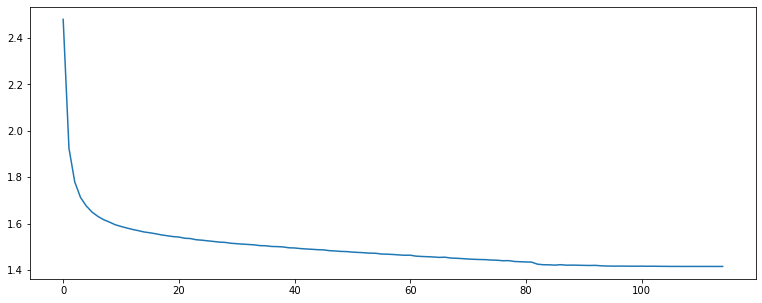

In [39]:
plt.plot(clf.loss_curve_)
plt.show()

In [40]:
y_pred_tr = clf.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)

Train Accuracy 0.5502857142857143
Train F1-score 0.2760976036097865
Val Recall 0.2763843817966971
Val Precision 0.2978042565455614


C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        52
          Classical       0.57      0.57      0.57       433
            Country       0.00      0.00      0.00       124
     Easy Listening       0.00      0.00      0.00        15
         Electronic       0.56      0.75      0.64      4420
       Experimental       0.33      0.13      0.19      1576
               Folk       0.45      0.30      0.36      1063
            Hip-Hop       0.58      0.43      0.50      1541
       Instrumental       0.37      0.33      0.35       945
      International       0.46      0.17      0.25       713
               Jazz       0.00      0.00      0.00       269
Old-Time / Historic       0.87      0.91      0.89       357
                Pop       0.00      0.00      0.00       830
               Rock       0.57      0.83      0.68      4972
           Soul-RnB       0.00      0.00      0.00       108
             Spoken    

array([[   0,    0,    0,    0,   10,    2,   12,    3,    2,    1,    0,
           0,    0,   22,    0,    0],
       [   0,  246,    0,    0,   17,   61,    6,    0,   81,    2,    0,
           2,    0,   18,    0,    0],
       [   0,    0,    0,    0,    8,    1,    6,   12,    1,    0,    0,
           0,    0,   96,    0,    0],
       [   0,    1,    0,    0,    6,    0,    0,    2,    4,    0,    0,
           0,    0,    2,    0,    0],
       [   0,   44,    0,    0, 3299,   98,   45,  157,  102,   19,    0,
           6,    0,  650,    0,    0],
       [   0,   44,    0,    0,  551,  204,   59,   35,  144,   34,    0,
          15,    1,  489,    0,    0],
       [   0,    4,    0,    0,   88,   38,  321,   29,   58,   14,    0,
           3,    0,  508,    0,    0],
       [   0,    0,    0,    0,  578,    8,   28,  668,    5,    6,    0,
           0,    0,  248,    0,    0],
       [   0,   60,    0,    0,  200,   76,   35,    5,  313,    5,    0,
           9,    0,  2

In [41]:
y_pred = clf.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.5337
Train F1-score 0.25805274420022684
Val Recall 0.2618873905355531
Val Precision 0.27567695627232813


C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        22
          Classical       0.51      0.53      0.52       186
            Country       0.00      0.00      0.00        54
     Easy Listening       0.00      0.00      0.00         6
         Electronic       0.55      0.73      0.63      1894
       Experimental       0.25      0.11      0.15       675
               Folk       0.39      0.27      0.32       456
            Hip-Hop       0.56      0.39      0.46       660
       Instrumental       0.31      0.28      0.29       405
      International       0.44      0.14      0.22       305
               Jazz       0.00      0.00      0.00       115
Old-Time / Historic       0.82      0.91      0.86       153
                Pop       0.00      0.00      0.00       356
               Rock       0.57      0.83      0.68      2131
           Soul-RnB       0.00      0.00      0.00        46
             Spoken    

array([[   0,    0,    0,    0,    7,    3,    2,    1,    1,    0,    0,
           0,    0,    8,    0,    0],
       [   0,   99,    0,    0,    8,   27,    5,    1,   38,    0,    0,
           0,    0,    8,    0,    0],
       [   0,    0,    0,    0,    2,    1,    8,    4,    0,    0,    0,
           0,    0,   39,    0,    0],
       [   0,    0,    0,    0,    3,    0,    0,    2,    1,    0,    0,
           0,    0,    0,    0,    0],
       [   0,   18,    0,    0, 1379,   41,   21,   77,   60,   12,    0,
           4,    0,  282,    0,    0],
       [   0,   34,    0,    0,  218,   71,   33,   15,   66,   14,    0,
          12,    0,  212,    0,    0],
       [   0,    5,    0,    0,   37,   16,  122,    9,   16,    8,    0,
           0,    0,  243,    0,    0],
       [   0,    0,    0,    0,  278,    6,   11,  260,    2,    2,    0,
           0,    0,  101,    0,    0],
       [   0,   30,    0,    0,   89,   42,   14,    3,  112,    3,    0,
           7,    0,  1

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[   0    1    0    0    6    3    0    2    0    1    0    0    0    9
     0    0]
 [   0  123    0    0    5    8   14    1   25    1    1    1    0    7
     0    0]
 [   0    1    0    0    8    0   11    1    0    0    0    0    0   33
     0    0]
 [   0    0    0    0    3    0    0    2    1    0    0    0    0    0
     0    0]
 [   0   19    0    0 1322   70   25  118   69   19    0    4    0  247
     0    1]
 [   0   31    0    0  200  103   32   23   70   22    0   12    1  180
     0    1]
 [   0    8    0    0   45   16  170   10   13    4    0    0    0  190
     0    0]
 [   0    0    0    0  257    4   14  292    2    0    0    1    0   89
     0    1]
 [   0   32    0    0   85   45   19    4  126    2    0    9    0   83
     0    0]
 [   0    4    0    0   96   10   33   33    3   50    0    1    0   75
     0    0]
 [   0    5    0    0   30   12   11    3   22    4    0    1    0   27
     0    0]
 [   0    3    0    0    

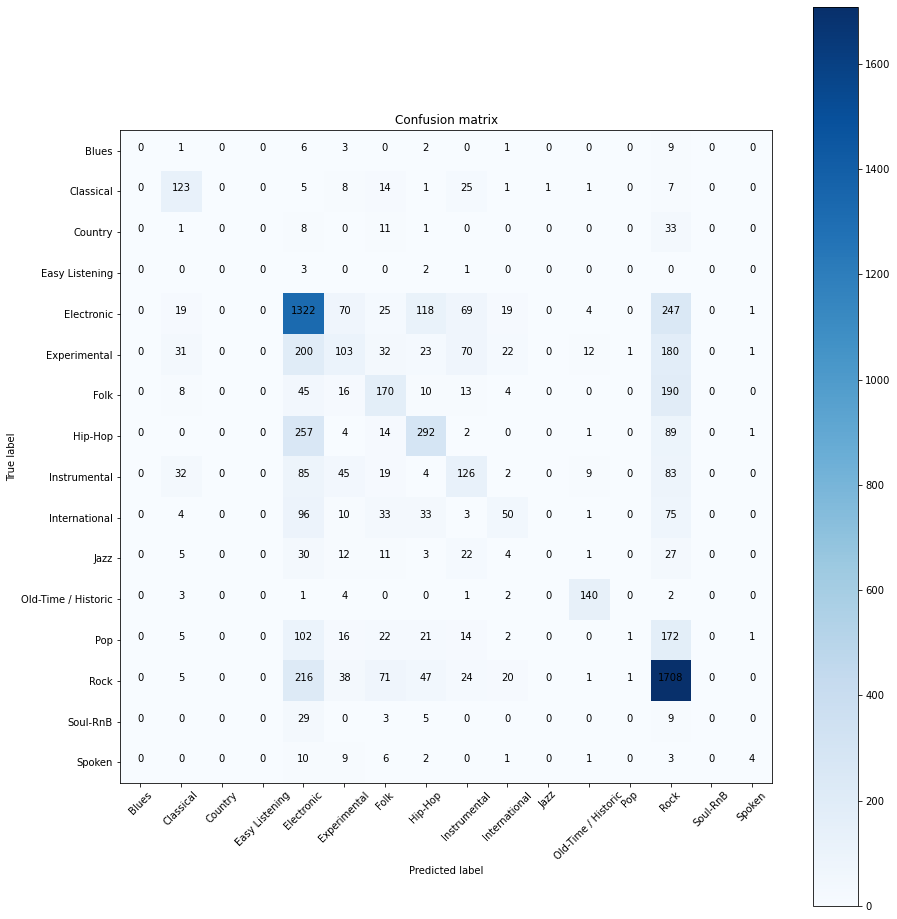

In [18]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=clf.classes_,
                      title='Confusion matrix')



plt.show()

20